##### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### Importing Data

In [2]:
deli = pd.read_csv("https://raw.githubusercontent.com/shashwatk1/IPL_Data_Analysis/main/data/deliveries.csv")
match = pd.read_csv("https://raw.githubusercontent.com/shashwatk1/IPL_Data_Analysis/main/data/matches.csv")

In [3]:
print("Deliveries:",deli.shape)
deli.head()

Deliveries: (179078, 21)


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
print("Matches:",match.shape)
match.head()

Matches: (756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
deli.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

In [6]:
match.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

### Data Preprocessing

##### Seeing the unique values in some of the columns

In [7]:
for (columnName, columnData) in deli[['inning','batting_team','over','ball','is_super_over','wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs','batsman_runs','extra_runs','total_runs','dismissal_kind']].iteritems(): 
    print('Deliveries - Colunm Name:', columnName) 
    print('Unique Values:', pd.Series(columnData.values).unique(),'\n') 
print("\n---------------------------------\n")
for (columnName, columnData) in match[['season','city','team1','toss_decision','result','dl_applied','venue']].iteritems(): 
    print('Matches - Colunm Name:', columnName) 
    print('Unique Values:', pd.Series(columnData.values).unique(),'\n') 

Deliveries - Colunm Name: inning
Unique Values: [1 2 3 4 5] 

Deliveries - Colunm Name: batting_team
Unique Values: ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals'] 

Deliveries - Colunm Name: over
Unique Values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Deliveries - Colunm Name: ball
Unique Values: [1 2 3 4 5 6 7 8 9] 

Deliveries - Colunm Name: is_super_over
Unique Values: [0 1] 

Deliveries - Colunm Name: wide_runs
Unique Values: [0 2 1 5 3 4] 

Deliveries - Colunm Name: bye_runs
Unique Values: [0 1 4 2 3] 

Deliveries - Colunm Name: legbye_runs
Unique Values: [0 1 2 5 3 4] 

Deliveries - Colunm Name: noball_runs
Unique Values: [0 1 2 5 3] 

Deliveries - Colunm Name: penalty_runs
Unique Values: [0

##### Shortening and Changing similiar names for easier understanding

In [8]:
old = ['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals']
new = ['SRH', 'RCB', 'MI', 'RPS', 'GUJ', 'KKR', 'KXIP', 'DC', 'CSK', 'RR', 'SRH', 'KOCHI', 'PUNE', 'RPS', 'DC']
deli = deli.replace(old, new )
match = match.replace(old, new)

print(deli['batting_team'].unique(), "Size:",deli['batting_team'].unique().shape[0],'\n')
print(match['team1'].unique(), "Size:",match['team1'].unique().shape[0])

['SRH' 'RCB' 'MI' 'RPS' 'GUJ' 'KKR' 'KXIP' 'DC' 'CSK' 'RR' 'KOCHI' 'PUNE'] Size: 12 

['SRH' 'MI' 'GUJ' 'RPS' 'RCB' 'KKR' 'DC' 'KXIP' 'CSK' 'RR' 'KOCHI' 'PUNE'] Size: 12


In [9]:
new_stad = ['Rajiv Gandhi International Stadium',
 'Maharashtra Cricket Association Stadium',
 'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
 'M. Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
 'Feroz Shah Kotla', 'Punjab Cricket Association IS Bindra Stadium',
 'Green Park', 'Punjab Cricket Association IS Bindra Stadium',
 'Sawai Mansingh Stadium', 'M. A. Chidambaram Stadium',
 'Dr DY Patil Sports Academy', 'Newlands', "St George's Park", 'Kingsmead',
 'SuperSport Park', 'Buffalo Park', 'New Wanderers Stadium',
 'De Beers Diamond Oval', 'OUTsurance Oval', 'Brabourne Stadium',
 'Sardar Patel Stadium', 'Barabati Stadium',
 'Vidarbha Cricket Association Stadium',
 'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
 'ACA-VDCA Cricket Stadium',
 'Subrata Roy Sahara Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
 'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
 'M. A. Chidambaram Stadium', 'Feroz Shah Kotla',
 'M. Chinnaswamy Stadium', 'Rajiv Gandhi International Stadium',
 'Punjab Cricket Association IS Bindra Stadium', 'ACA-VDCA Stadium'] 
 
old_stad = ['Rajiv Gandhi International Stadium, Uppal',
 'Maharashtra Cricket Association Stadium',
 'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
 'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
 'Feroz Shah Kotla', 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 'Green Park', 'Punjab Cricket Association Stadium, Mohali',
 'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
 'Dr DY Patil Sports Academy', 'Newlands', "St George's Park", 'Kingsmead',
 'SuperSport Park', 'Buffalo Park', 'New Wanderers Stadium',
 'De Beers Diamond Oval', 'OUTsurance Oval', 'Brabourne Stadium',
 'Sardar Patel Stadium, Motera', 'Barabati Stadium',
 'Vidarbha Cricket Association Stadium, Jamtha',
 'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 'Subrata Roy Sahara Stadium',
 'Shaheed Veer Narayan Singh International Stadium',
 'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
 'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
 'M. A. Chidambaram Stadium', 'Feroz Shah Kotla Ground',
 'M. Chinnaswamy Stadium', 'Rajiv Gandhi Intl. Cricket Stadium',
 'IS Bindra Stadium', 'ACA-VDCA Stadium'] 

match = match.replace(old_stad, new_stad) 
match['venue'].unique()

array(['Rajiv Gandhi International Stadium',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M. Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla', 'Punjab Cricket Association IS Bindra Stadium',
       'Green Park', 'Sawai Mansingh Stadium',
       'M. A. Chidambaram Stadium', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium', 'Sardar Patel Stadium',
       'Barabati Stadium', 'Vidarbha Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'ACA-VDCA Cricket Stadium', 'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket St

In [10]:
old_diss = [None, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled', 'stumped',
 'retired hurt', 'hit wicket', 'obstructing the field']
new_diss = ["0","1","1","0","1","1","1","0","1","0"]
new_diss2 = ["0","1","1","1","1","1","1","1","1","1"]
deli['dismissal_by_bowler'] = deli['dismissal_kind'].replace(old_diss, new_diss)
deli['dismissal_by_bowler'] = deli['dismissal_by_bowler'].astype(int)
deli['is_out'] = deli['dismissal_kind'].replace(old_diss, new_diss2)
deli['is_out'] = deli['is_out'].astype(int)
print(deli.groupby(['dismissal_kind'], sort = False)['is_out'].sum().reset_index(),'\n\n')
print(deli.groupby(['dismissal_kind'], sort = False)['dismissal_by_bowler'].sum().reset_index())

          dismissal_kind  is_out
0                 caught    5348
1                 bowled    1581
2                run out     852
3                    lbw     540
4      caught and bowled     211
5                stumped     278
6           retired hurt      12
7             hit wicket      10
8  obstructing the field       2 


          dismissal_kind  dismissal_by_bowler
0                 caught                 5348
1                 bowled                 1581
2                run out                    0
3                    lbw                  540
4      caught and bowled                  211
5                stumped                  278
6           retired hurt                    0
7             hit wicket                   10
8  obstructing the field                    0


##### Removing data of matches that were not played

In [11]:
match.iloc[np.where(match['winner'].isnull() == True)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,DC,PUNE,DC,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,DC,RCB,RCB,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [12]:
print(match.shape)
no_res = np.where(match['result'] == 'no result')[0]
match.iloc[no_res]

(756, 18)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,DC,PUNE,DC,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,DC,RCB,RCB,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,RCB,RR,RR,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [13]:
for i in no_res:
    id = match.iloc[i]['id']
    a = np.where(deli['match_id'] == id)[0]
    deli = deli.drop(a).reset_index().drop(['index'], axis=1)

match = match.drop(no_res).reset_index().drop(['index'], axis=1)

#### Adding is_four and is_six column

In [14]:
is_no = []
is_wide = []
is_bye = []
is_legbye = []
for i in deli['noball_runs']:
    if i != 0:
        is_no.append(1)
    else:
        is_no.append(0)

for i in deli['wide_runs']:
    if i != 0:
        is_wide.append(1)
    else:
        is_wide.append(0)
    
for i in deli['bye_runs']:
    if i != 0:
        is_bye.append(1)
    else:
        is_bye.append(0)
    
for i in deli['legbye_runs']:
    if i != 0:
        is_legbye.append(1)
    else:
        is_legbye.append(0)
    
deli['is_no'] = is_no
deli['is_wide'] = is_wide
deli['is_bye'] = is_bye
deli['is_legbye'] = is_legbye

In [15]:
is_four = []
is_six = []
is_bound = []
bound_runs = []

for i in deli['batsman_runs']:
    
    if i == 4 or i == 5:
        is_four.append(1)
        is_six.append(0)
        is_bound.append(1)
        bound_runs.append(i)
    elif i == 6 or i == 7:
        is_four.append(0)
        is_six.append(1)
        is_bound.append(1)
        bound_runs.append(i)
    else:
        is_four.append(0)
        is_six.append(0)
        is_bound.append(0)
        bound_runs.append(0)
        
is_dot = []

for i,j in deli[['batsman_runs','is_bye','is_legbye']].iterrows():
    if j[0] == 0 or j[1] == 1 or j[2] == 1:  
        is_dot.append(1)
    else:
        is_dot.append(0)

      
deli['is_four'] = is_four
deli['is_six'] = is_six  
deli['is_bound'] = is_bound
deli['bound_runs'] = bound_runs  
deli['is_dot'] = is_dot

##### Adding year column to deliveries

In [16]:
match_id = deli['match_id'].values.tolist()
year = []
for i in match_id:
    y = match[match['id']==i]['season'].values.tolist()
    year.append(y[0])
deli['year'] = year

## Functions

##### Head to Head and last 3 years

In [17]:
def head2head(t1,t2,df = match):
    s1 = (df['team1'] == t1) & (df['team2'] == t2)
    s2 = (df['team1'] == t2) & (df['team2'] == t1)
    head = df.iloc[np.where(s1 | s2)]
    head = head.sort_values(by = 'season').reset_index().drop(['id','index'], axis=1)
    return head

y1 = deli.iloc[np.where(deli['year'] == 2017)[0]]
y2 = deli.iloc[np.where(deli['year'] == 2018)[0]]
y3 = deli.iloc[np.where(deli['year'] == 2019)[0]]
year3 = pd.DataFrame.append(y1,y2, ignore_index=True)
last3years = pd.DataFrame.append(year3,y3, ignore_index=True)

##### Head to Head Score Function

In [18]:
def head(t1, t2):
  head_to_head = head2head(t1,t2)
  t1_win=0
  t2_win=0
  for i in head_to_head['winner']:
    if i == t1:
      t1_win+=1
    if i == t2:
      t2_win+=1
  t1_arr = []
  t2_arr = []
  year_arr = []
  for i in head_to_head[['season','winner']].iterrows():
      index, year, win = i[0], i[1][0], i[1][1]
      if year in year_arr:
          if win == t1:
              t1_arr[year_arr.index(year)]+=1  
          if win == t2:
              t2_arr[year_arr.index(year)]+=1  
      else:
          year_arr.append(year)
          if win == t1:
              t1_arr.append(1)
              t2_arr.append(0)
          if win == t2:
              t1_arr.append(0)
              t2_arr.append(1)
  win_by_year = pd.DataFrame([t1_arr, t2_arr], columns = year_arr, index = [t1, t2])
  print("Head to Head:",t1,'v/s',t2)
  print(t1+':', t1_win)
  print(t2+':', t2_win) 
  return win_by_year

##### Total Dot balls

In [19]:
def tot_dot(t1, t2, df):
    print('is_dot')
    is_df = df[((df['batting_team']==t1)&(df['bowling_team']==t2))|((df['batting_team']==t2)&(df['bowling_team']==t1))]
    is_df = is_df.groupby(['match_id'], sort = False)['is_dot'].sum().reset_index()
    is_tdf = is_df['is_dot'] >= 91
    print(is_df['is_dot'].describe())
    print("Total dots >= 90")
    print(is_tdf.value_counts())
    plt.hist(is_df['is_dot'], range = [60,120])
    plt.show()

##### Total wickets in the match

In [20]:
def tot_wick(t1,t2,df):
    df = df[((df['batting_team']==t1)&(df['bowling_team']==t2))|((df['batting_team']==t2)&(df['bowling_team']==t1))]
    df = df[df['over']>=16]
    tot_wick = df.groupby(['match_id'], sort = False)['is_out'].sum().reset_index()    
    print(tot_wick['is_out'].describe())
    print(tot_wick['is_out'].value_counts())
    plt.hist(tot_wick['is_out'])
    plt.show()

##### Batsman contribution in total score

In [21]:
def bat_cont(bat, against, df):
    new_df = df
    if against != '':
        new_df = new_df[new_df['bowling_team'] == against]
    edf = new_df[new_df['batting_team']=='']
    bat_df = new_df[new_df['batsman']==bat]
    for i in bat_df['match_id'].unique():
        edf = pd.DataFrame.append(edf,new_df[new_df['match_id'] == i])
    edf = edf.reset_index().drop(['index'],axis = 1)
    bat_runs = edf[edf['batsman']==bat].groupby(['match_id'], sort = False)['batsman_runs'].sum().reset_index()
    tot_runs = edf.groupby(['match_id'], sort = False)['total_runs'].sum().reset_index()
    blist = bat_runs['batsman_runs'].values.tolist()
    rlist = tot_runs['total_runs'].values.tolist()
    df2 = pd.DataFrame({'bat_runs':blist,'tot_runs':rlist})
    df2['percentage'] = df2['bat_runs']/df2['tot_runs'] *100
    print(df2['percentage'].describe(),'\n')
    print(df2['percentage'].value_counts(),'\n')
    y = df2['percentage'].shape[0]
    plt.scatter(df2['percentage'],range(y))
    plt.show()

##### Extra runs

In [22]:
def extra(t1, t2, a, df):
    col_arr = ['is_no','is_wide','is_bye','is_legbye']
    col = col_arr[a]
    print(col)
    is_df = df[((df['batting_team']==t1)&(df['bowling_team']==t2))|((df['batting_team']==t2)&(df['bowling_team']==t1))]
    is_df = is_df.groupby(['match_id'], sort = False)[col].sum().reset_index()
    print(is_df[col].value_counts())
    plt.hist(is_df[col])
    plt.show()

## Predicting Outputs

In [23]:
team1, team2 = 'KKR','KXIP'
head_tab = head(team1, team2)
head_tab

Head to Head: KKR v/s KXIP
KKR: 17
KXIP: 8


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
KKR,1,1,1,1,1,1,3,2,2,1,1,2
KXIP,1,1,1,0,1,1,1,0,0,1,1,0


ALL TIME: 
is_dot
count     25.000000
mean      91.000000
std       14.335271
min       61.000000
25%       84.000000
50%       94.000000
75%      101.000000
max      115.000000
Name: is_dot, dtype: float64
Total dots >= 90
True     14
False    11
Name: is_dot, dtype: int64


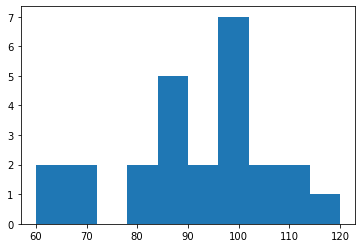


LAST 3 YEARS:
is_dot
count     6.000000
mean     77.500000
std      14.597945
min      61.000000
25%      65.500000
50%      76.500000
75%      89.000000
max      96.000000
Name: is_dot, dtype: float64
Total dots >= 90
False    4
True     2
Name: is_dot, dtype: int64


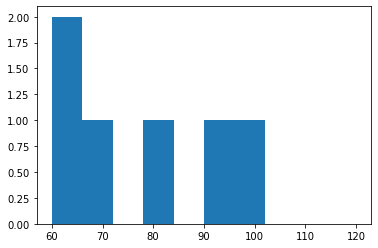

In [24]:
print("ALL TIME: ")
tot_dot(team1, team2, deli)
print("\nLAST 3 YEARS:")
tot_dot(team1, team2, last3years)


ALL TIME: 
count    25.000000
mean      4.200000
std       2.020726
min       1.000000
25%       2.000000
50%       4.000000
75%       6.000000
max       8.000000
Name: is_out, dtype: float64
6    5
2    5
5    4
4    3
3    3
7    2
1    2
8    1
Name: is_out, dtype: int64


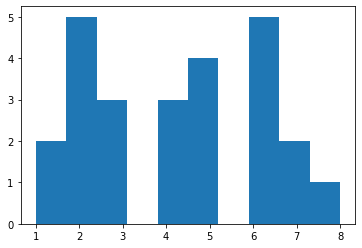


LAST 3 YEARS:
count    6.000000
mean     4.166667
std      1.834848
min      2.000000
25%      2.500000
50%      4.500000
75%      5.750000
max      6.000000
Name: is_out, dtype: float64
6    2
2    2
5    1
4    1
Name: is_out, dtype: int64


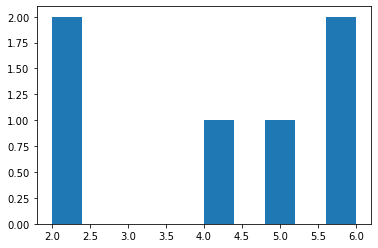

In [25]:
print("ALL TIME: ")
tot_wick(team1,team2,deli)
print("\nLAST 3 YEARS:")
tot_wick(team1,team2, last3years)

ALL TIME: 
count    13.000000
mean     15.973633
std      13.296558
min       0.000000
25%       4.444444
50%      12.107623
75%      23.497268
max      43.312102
Name: percentage, dtype: float64 

14.705882    1
4.444444     1
12.107623    1
43.312102    1
26.347305    1
35.294118    1
23.497268    1
2.898551     1
11.363636    1
21.290323    1
9.395973     1
0.000000     1
3.000000     1
Name: percentage, dtype: int64 



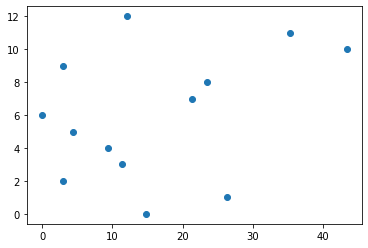


LAST 3 YEARS:
count     4.000000
mean     22.113732
std      10.749328
min      12.107623
25%      14.056318
50%      20.526594
75%      28.584008
max      35.294118
Name: percentage, dtype: float64 

14.705882    1
26.347305    1
35.294118    1
12.107623    1
Name: percentage, dtype: int64 



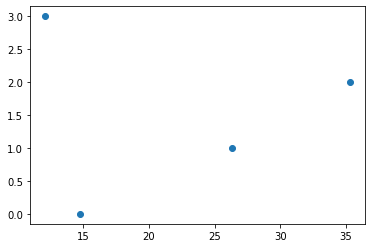

In [26]:
batsman = 'GJ Maxwell'
print("ALL TIME: ")
bat_cont(batsman, team1, deli)
print("\nLAST 3 YEARS:")
bat_cont(batsman, team1, last3years)

ALL TIME: 
is_no
0    16
1     7
2     2
Name: is_no, dtype: int64


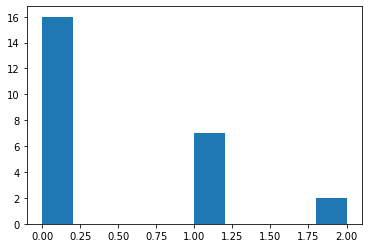


LAST 3 YEARS:
is_no
0    3
1    2
2    1
Name: is_no, dtype: int64


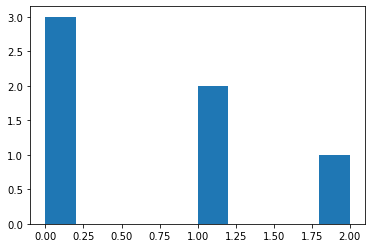

In [27]:
print("ALL TIME: ")
extra(team1, team2, 0, deli)
print("\nLAST 3 YEARS:")
extra(team1, team2, 0, last3years)